# Exercise 1

# Generate two dataset of 3D 500 vectors, following a standard Gaussian distribution; transform these two datasets 

In [6]:
import numpy as np
s1 = np.array([[3,0,0],[0,1,0],[0,0,0.01]])    # dilation
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]]) # rotation
rndn3d1 = np.random.randn(500,3)
rndef1 = rndn3d1.dot(s1).dot(r1)
rndn3d2 = np.random.randn(500,3)
rndef2 = rndn3d2.dot(s1).dot(r1) + [0, 0, 1]
rndef = np.concatenate((rndef1, rndef2))
rndef.shape

(1000, 3)

#  Generate the corresponding labels : 1 for therndef1data, 2 for those ofrndef2  and visualize the data

Generation of labels

In [7]:
lcls1 = np.ones(500)
lcls2 = 2 * np.ones(500)
lcls = np.concatenate((lcls1, lcls2))

Visualization

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:,0], rndef[:,1], rndef[:,2], c=lcls)
plt.show()

<Figure size 640x480 with 1 Axes>

# Apply factorial discriminant analysis to these data and visualize the data

Define the model

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(rndef,lcls)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Visualize

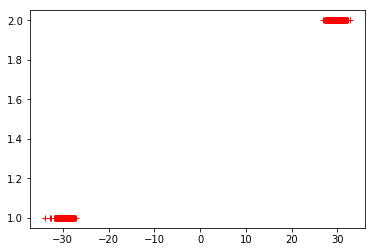

In [10]:
rndt = lda.transform(rndef)
plt.plot(rndt, lcls, 'r+')
plt.show()

## Reduce the dimension of data with PCA with two components

We apply PCA with two components

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(rndef)
rndp = pca.transform(rndef)

Visualization

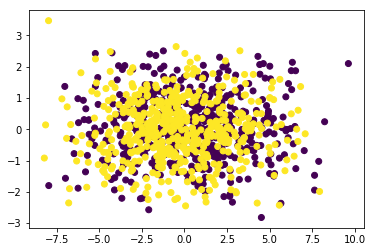

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(rndp[:,0], rndp[:,1], c=lcls)
plt.show()

# Apply the factorial discrimant analysis to the reduced data of the previous  question and visualize

https://sebastianraschka.com/Articles/2014_python_lda.html#principal-component-analysis-vs-linear-discriminant-analysis

1 Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW
(where every column represents an eigenvector).
5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. 
This can be summarized by the matrix multiplication: YY=XX×WW (where XX is a n×d-dimensional matrix representing the n samples, 
                                                            and yy are the transformed n×k-dimensional samples in the new subspace).

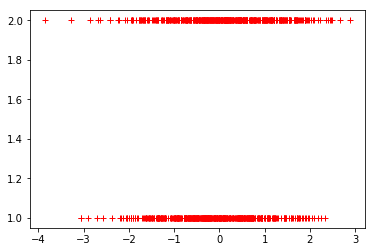

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(rndp,lcls)
rndpt = lda.transform(rndp)
rndpt.shape
plt.plot(rndpt, lcls, 'r+')
plt.show()

# Factorial discrimant analysis of the dataset leaf with scikit-learn

### Import the data.

In [17]:
leaf = np.loadtxt('leaf.csv', delimiter=',')

### Apply FDA / LDA

We define the model

In [14]:
lda = LinearDiscriminantAnalysis()
lda.fit(leaf[:,2:],leaf[:,0])
leafl = lda.transform(leaf[:,2:])

Visualization

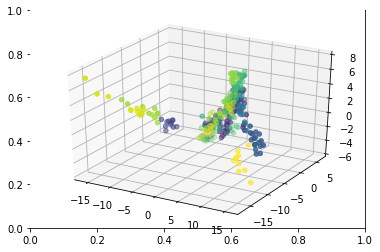

In [15]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(leafl[:,0],leafl[:,1],leafl[:,2],c=leaf[:,0])
plt.show()

# Compare the results with PCA

Comparing with PCA we see that LDA separate a little beter the classes but it is quite difficult to discriminate them


# IRIS dataset

In [73]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,:4]# we only take the first two features.
y = iris.target # values the data points to - the class of iris
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}


In [74]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [70]:
from sklearn.preprocessing import LabelEncoder
X = df.values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

KeyError: 4

# Computing the d-dimensional mean vectors

In [75]:
mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 0: [5.006 3.428 1.462 0.246]

Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]



# Computing the Scatter Matrices

Within class scatter matrix

In [76]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(0,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(1,4) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)


within-class Scatter Matrix:
 [[ 5492.7442  1450.8896  2415.0682 -1272.3598]
 [ 1450.8896  2638.595   1337.0536  2502.4656]
 [ 2415.0682  1337.0536  2693.5522  1574.2042]
 [-1272.3598  2502.4656  1574.2042  5042.1362]]


Between-class scatter matrix

In [32]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)


between-class Scatter Matrix:
 [[ 35.48571111 -16.84988889  98.4518      40.49977778]
 [-16.84988889  10.99771111 -49.7646     -19.48822222]
 [ 98.4518     -49.7646     276.181      112.622     ]
 [ 40.49977778 -19.48822222 112.622       46.24444444]]


## Eigenvalues and Eigenvectors

both eigenvectors and eigenvalues are providing us with information about the distortion of a linear transformation: The eigenvectors are basically the direction of this distortion, and the eigenvalues are the scaling factor for the eigenvectors that describing the magnitude of the distortion.

If we are performing the LDA for dimensionality reduction, the eigenvectors are important since they will form the new axes of our new feature subspace; the associated eigenvalues are of particular interest since they will tell us how “informative” the new “axes” are.

In [77]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))



Eigenvector 1: 
[[-0.07451595]
 [ 0.72598089]
 [-0.61730656]
 [-0.29382261]]
Eigenvalue 1: 1.85e-01

Eigenvector 2: 
[[ 0.45246428]
 [-0.55486861]
 [-0.47182744]
 [ 0.51456366]]
Eigenvalue 2: 1.82e-03

Eigenvector 3: 
[[ 0.64201875]
 [-0.38779539]
 [-0.40822371]
 [ 0.26848437]]
Eigenvalue 3: -2.60e-17

Eigenvector 4: 
[[ 0.64201875]
 [-0.38779539]
 [-0.40822371]
 [ 0.26848437]]
Eigenvalue 4: -2.60e-17
